<a href="https://colab.research.google.com/github/granistogurning/DQLAB_Batch21_Grenk/blob/main/Sesi12_Grenk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Overview**

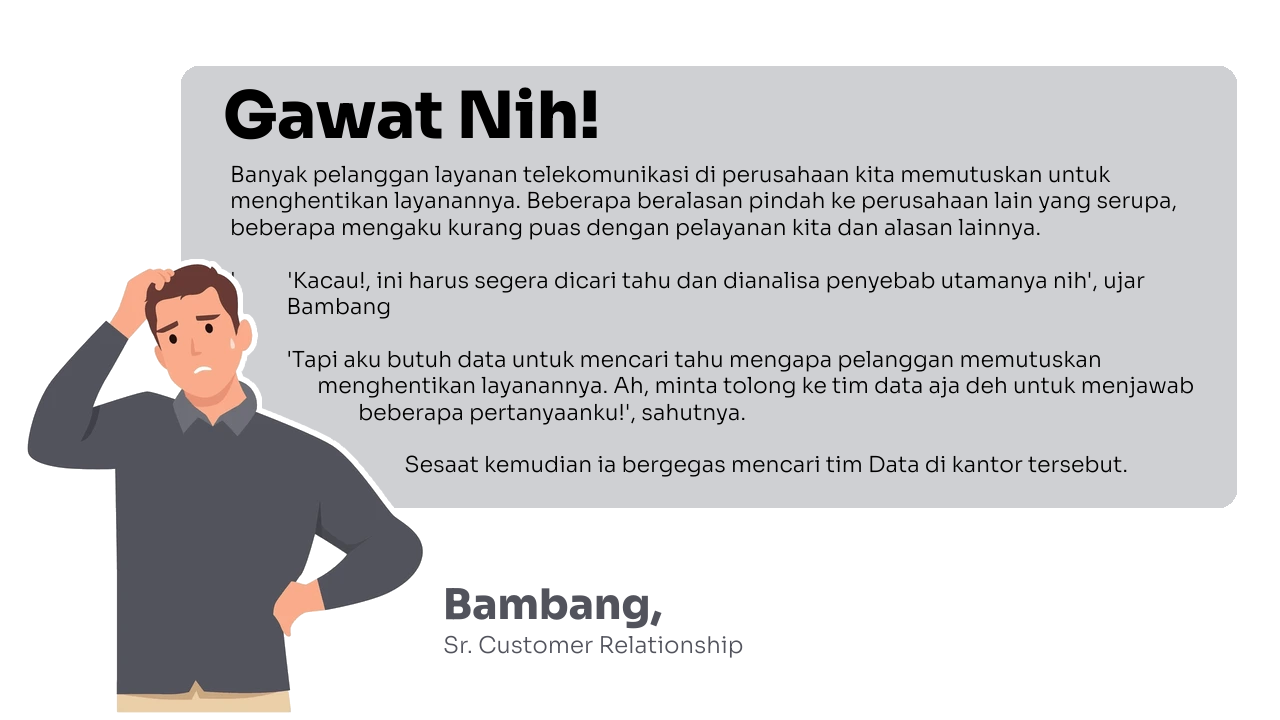

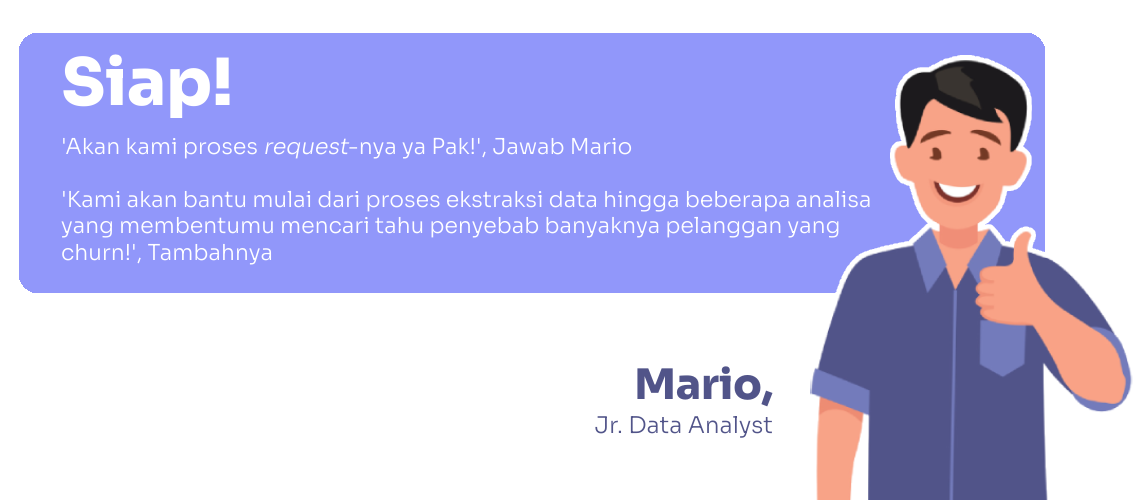

# **A. First Step : Data yang Digunakan**

Data yang digunakan adalah data telco customer yang termuat dalam google big query

In [17]:
from google.colab import auth, data_table
from google.cloud import bigquery
from pandas_gbq import to_gbq

# Proses autentikasi akun
auth.authenticate_user()
print('Authenticated')

Authenticated


In [18]:
# Buat BigQuery client
project_id = 'confident-baton-480212-g3'
client = bigquery.Client(project = project_id)

In [19]:
import pandas as pd
pd.set_option('display.max_columns', None)

# Inisialisasi query yang akan dijalankan
query = """
  SELECT
    *
  FROM `confident-baton-480212-g3.dqlab_python.data_telco_customer_clean`
"""

# Proses ekstraksi data dari BigQuery ke pandas
data_telco_clean = client.query(query).to_dataframe()

# Tampilkan hasil
data_telco_clean.head(5)

customer_id   open_date  gender  age married  number_of_dependents  \
0  7841-TZDMQ  2025-06-24    Male   19      No                     0   
1  0822-GAVAP  2025-06-17  Female   19      No                     0   
2  5673-FSSMF  2025-07-14  Female   19      No                     0   
3  4704-ERYFC  2023-10-11  Female   19     Yes                     0   
4  4763-PGDPO  2025-04-05  Female   19      No                     0   

   satisfaction_score customer_status  cltv  number_of_referrals  \
0                   3         Churned  2667                    0   
1                   1         Churned  3146                    0   
2                   3         Churned  4611                    0   
3                   1         Churned  2159                    1   
4                   1         Churned  4494                    0   

   tenure_in_months     offer phone_service multiple_lines internet_service  \
0                 2  No Offer           Yes             No              Yes   
1                 2   Offer E            No             No              Yes   
2                 1   Offer E           Yes            Yes              Yes   
3                22  No Offer           Yes             No              Yes   
4                 4  No Offer           Yes             No              Yes   

  internet_type online_security online_backup device_protection_plan  \
0           DSL              No            No                     No   
1           DSL              No            No                     No   
2         Cable              No            No                     No   
3   Fiber Optic              No            No                     No   
4   Fiber Optic              No            No                     No   

  premium_tech_support streaming_tv streaming_movies        contract  \
0                   No           No               No  Month-to-Month   
1                   No           No              Yes  Month-to-Month   
2                   No           No              Yes  Month-to-Month   
3                   No           No               No  Month-to-Month   
4                   No           No               No  Month-to-Month   

    payment_method monthly_charge total_revenue churn_category  churn_date  \
0      Credit Card           46.0        184.12          Other  2025-08-29   
1  Bank Withdrawal           34.7         62.25     Competitor  2025-08-17   
2  Bank Withdrawal          60.15        113.63       Attitude  2025-08-17   
3  Bank Withdrawal          69.25       2260.42     Competitor  2025-08-14   
4  Bank Withdrawal           70.4        515.48     Competitor  2025-08-06   

                                churn_reason  
0                                 Don't know  
1               Competitor made better offer  
2                 Attitude of support person  
3  Competitor offered higher download speeds  
4              Competitor had better devices

Berikut deskripsi singkat untuk tiap kolom:

* `customer_id` : ID unik untuk mengidentifikasi setiap pelanggan  
* `open_date` : Tanggal pelanggan pertama kali bergabung atau membuka akun layanan  
* `gender` : Jenis kelamin pelanggan (Male/Female)  
* `age` : Usia pelanggan dalam tahun  
* `married` : Status pernikahan pelanggan (Yes/No)  
* `number_of_dependents` : Jumlah tanggungan yang dimiliki pelanggan  
* `satisfaction_score` : Skor kepuasan pelanggan terhadap layanan (skala 1–5)  
* `customer_status` : Status pelanggan saat ini (Active, Churned, Joined)  
* `cltv` : Customer Lifetime Value, nilai total yang dihasilkan pelanggan sepanjang masa berlangganan  
* `number_of_referrals` : Jumlah referral/rekomendasi yang dilakukan pelanggan  
* `tenure_in_months` : Lama pelanggan berlangganan dalam bulan  
* `offer` : Penawaran khusus atau paket promosi yang diterima pelanggan (misalnya Offer A, Offer B, None)  
* `phone_service` : Status penggunaan layanan telepon (Yes/No)  
* `internet_service` : Status penggunaan layanan internet (Yes/No)  
* `internet_type` : Jenis layanan internet yang digunakan (DSL, Fiber Optic, Cable)  
* `contract` : Jenis kontrak pelanggan (Month-to-Month, One Year, Two Year)  
* `payment_method` : Metode pembayaran yang digunakan pelanggan (Credit Card, Bank Transfer, Electronic Check, dll.)  
* `monthly_charge` : Biaya langganan bulanan pelanggan  
* `total_revenue` : Total pendapatan yang dihasilkan dari pelanggan sejak bergabung  
* `churn_category` : Kategori alasan churn pelanggan
* `churn_date` : Tanggal kapan customer berhenti berlangganan
* `churn_reason` : Alasan spesifik pelanggan berhenti berlangganan  


In [20]:
# Memperoleh informasi umum pada data
data_telco_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7041 entries, 0 to 7040
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customer_id             7041 non-null   object
 1   open_date               7041 non-null   dbdate
 2   gender                  7041 non-null   object
 3   age                     7041 non-null   Int64 
 4   married                 7041 non-null   object
 5   number_of_dependents    7041 non-null   Int64 
 6   satisfaction_score      7041 non-null   Int64 
 7   customer_status         7041 non-null   object
 8   cltv                    7041 non-null   Int64 
 9   number_of_referrals     7041 non-null   Int64 
 10  tenure_in_months        7041 non-null   Int64 
 11  offer                   7041 non-null   object
 12  phone_service           7041 non-null   object
 13  multiple_lines          7041 non-null   object
 14  internet_service        7041 non-null   object
 15  inte

In [21]:
data_telco_clean['monthly_charge'] = data_telco_clean['monthly_charge'].astype(pd.Float64Dtype())
data_telco_clean['total_revenue'] =  data_telco_clean['total_revenue'].astype(pd.Float64Dtype())

data_telco_clean['open_date'] = pd.to_datetime(data_telco_clean['open_date'])
data_telco_clean['churn_date'] = pd.to_datetime(data_telco_clean['churn_date'])

In [22]:
data_telco_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7041 entries, 0 to 7040
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customer_id             7041 non-null   object        
 1   open_date               7041 non-null   datetime64[ns]
 2   gender                  7041 non-null   object        
 3   age                     7041 non-null   Int64         
 4   married                 7041 non-null   object        
 5   number_of_dependents    7041 non-null   Int64         
 6   satisfaction_score      7041 non-null   Int64         
 7   customer_status         7041 non-null   object        
 8   cltv                    7041 non-null   Int64         
 9   number_of_referrals     7041 non-null   Int64         
 10  tenure_in_months        7041 non-null   Int64         
 11  offer                   7041 non-null   object        
 12  phone_service           7041 non-null   object  

## **Data Profiling**

Data profiling adalah proses menganalisis dan menilai kualitas data secara menyeluruh untuk memahami struktur, isi, dan kualitas dataset sebelum digunakan.

Untuk melakukan data profiling pada pandas dapat menggunakan library `ydata-profiling`


### 👨‍💻 Task 1A - Lakukan installasi library

Install library ydata-profiling dengan mengeksekusi perintah

```pip install ydata-profiling```

In [23]:
pip install ydata-profiling

### 👨‍💻 Task 1B - Proses Profiling Data

Setelah library terinstall, lakukan proses profiling data pada DataFrame `data_telco_clean` dan beri judul Data Profiling Report

<br>docs:*https://docs.profiling.ydata.ai/latest/getting-started/concepts/*

In [24]:
# Import library yang digunakan
from ydata_profiling import ProfileReport

# Lakukan proses profiling data
profile = ProfileReport(
    df = data_telco_clean,
    title = 'Data Profiling Report'
)

# Tampilkan hasilnya
display(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 29/29 [00:01<00:00, 25.51it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 👨‍💻 Task 1C - Perlu Disimpan?

Profiling Data bisa disimpan untuk kebutuhan reporting kepada audiens. Simpan hasil profiling ke dalam file dengan nama `profiling_report_data_telco.html`

In [25]:
# Definsikan nama file
nama_file = 'profiling_report_data_telco.html'

# Simpan hasilnya
profile.to_file('profiling_report_data_telco.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

*Setelah membaca hasil profiling datanya, adakah kamu menemukan sesuatu yang menarik?*

In [26]:
# Lakukan perbaikan disini jika ditemukan

data_telco_clean['gender'] = data_telco_clean['gender'].map({
    'Men': 'Male',
    'Woman' : 'Female',
    'Male' :'Male',
    'Female' :'Female'
    })

---
# **B. Prerequisite : Data Visualization**

Visualisasi data adalah proses menyajikan data dalam bentuk visual—seperti grafik, diagram, peta, atau dashboard—agar data lebih mudah dipahami, dianalisis, dan dikomunikasikan dibandingkan hanya melihat angka mentah atau tabel panjang. Tujuan proses visualisasi data :

1. Mempermudah pemahaman
2. Menemukan pola & anomali
3. Mendukung pengambilan keputusan
4. Memudahkan komunikasi data
5. Membandingkan data dengan jelas

<br>**Data Visualization Cheat Sheet**

<img src="https://www.ml4devs.com/images/illustrations/data-viz-cheatsheet-extreme-presentation-method.webp" width="60%">

https://public.tableau.com/app/profile/andy.kriebel/viz/VisualVocabulary/VisualVocabulary



## **Teknik Visualisasi Data**

Untuk melakukan visualisasi biasanya akan dilakukan proses agregasi terlebih dahulu baru melakukan visualisasi data. Gunakan library plotly untuk menampilkan visualisasi yang dinamis di Python

```
import plotly.express as px
```

<br>docs : *https://plotly.com/python/*

### 👨‍💻 Task B1 - Agregasi Data

Hitung total customer berdasarkan status customer tersebut yang ada pada data lalu simpan kedalam variabel `total_cust_per_status` dan tampilkan datanya!

In [27]:
# Buat agregasi terlebih dahulu
total_cust_per_status = data_telco_clean.groupby('customer_status', as_index = False).agg(total_customer = ('customer_id', 'count'))

# Tampilkan data
display(total_cust_per_status)

customer_status  total_customer
0         Churned            1867
1          Joined             454
2          Stayed            4720

### 👨‍💻 Task B2 - Visualisasi Pertamamu

Setelah agregasi terbentuk, langkah selanjutnya adalah lakukan visualisasi dengan diagram Pie!

<br>docs: *https://plotly.com/python/pie-charts/*

In [28]:
# Import library untuk visualisasi
import plotly.express as px

# Buat pie chart
fig = px.pie(
    names = total_cust_per_status['customer_status'],
    values = total_cust_per_status['total_customer']
)

# Tampilkan diagram
fig.show()

## **Prinsip GESTALT**

Grafik sudah terbentuk? Keren! Kamu sudah berhasil membuat grafik dinamis di Python (coba arahkan kursor ke grafik tersebut :D). Nah yang lebih menarik, ada aturan atau prinsip 'khusus' agar visualisasimu tampak lebih menarik. Prinsip tersebut biasa dikenal dengan GESTALT Principle.

Prinsip GESTALT dalam visualisasi data adalah sekumpulan prinsip psikologi persepsi yang menjelaskan bagaimana otak manusia secara alami mengelompokkan dan menafsirkan elemen visual. Prinsip ini membantu kita merancang visualisasi yang lebih intuitif, mudah dibaca, dan tidak membingungkan.

<br>***Kenapa Gestalt penting dalam visualisasi data?***

Karena visualisasi yang baik mengikuti cara otak bekerja, bukan memaksa pembaca berpikir keras.

Dengan Gestalt:
* Grafik lebih cepat dipahami
* Pola langsung terlihat
* Risiko salah tafsir berkurang

<img src="https://miro.medium.com/v2/1*cfRl07KmQMIRtk5IZmIWcA.png" width="50%">

<br>docs: *https://www.interaction-design.org/literature/topics/gestalt-principles?srsltid=AfmBOoqICMh7lMbMvuDNVpdP6NL33JI27GygHz5EZt3eBBdETMzSbQBy*

### 👨‍💻 Task B3 - Percantik Visualisasimu

Lengkapi kode berikut untuk membuat visualisasi yang menerapkan prinsip GESTALT

In [29]:
# Import library untuk visualisasi
import plotly.express as px

# Hitung total data
total_data = total_cust_per_status['total_customer'].sum()

# Warna
hijau_pucat = '#E0ECE4'
hijau_agak_cerah = '#D3E0d7'
merah = '#FF4B5C'

# Buat pie chart
fig = px.pie(
    values = total_cust_per_status['total_customer'],
    names = total_cust_per_status['customer_status'],
    color_discrete_sequence = [hijau_pucat, merah, hijau_agak_cerah],
    hole = 0.65
)

# Atur posisi label
fig.update_traces(
    textposition = 'outside',
    textinfo = 'percent+label',
    hovertemplate='<b>%{label}</b><br>%{value} Customers'
)

# Atur luas grafik, hapus legend dan beri judul
fig.update_layout(
    width = 800,
    height = 600,
    showlegend = False,
    margin = dict(l=160, r=200, t=100, b=30),
    title = dict(
        text = f"<b>Proporsi Status Pelanggan Perusahaan Telco</b><br><sup>Lebih dari seperempat customer telah <span style='color:{merah}'><b>berhenti berlangganan</b></span></sup>",
        font = dict(
            size = 22,
            color = '#757882'
        ),
        y = 0.92,
        x = 0.09
    )
)

# Berikan informasi total pelanggan di tengah donut chart
fig.add_annotation(
    text = f'Total Pelanggan<br><b><span style="font-size: 28px;">{total_data}</b></span>',
    x = 0.5,
    y = 0.5,
    showarrow = False,
    font = dict(size = 20)
)

# Tampilkan grafik
fig.show()

*Bagaimana? Apakah ada perubahan signifikan? Menurutmu kenapa total pelanggan tiap statusnya perlu kita visualisasikan dengan diagram donut dengan kombinasi warna diatas?*

Share your answer!

...

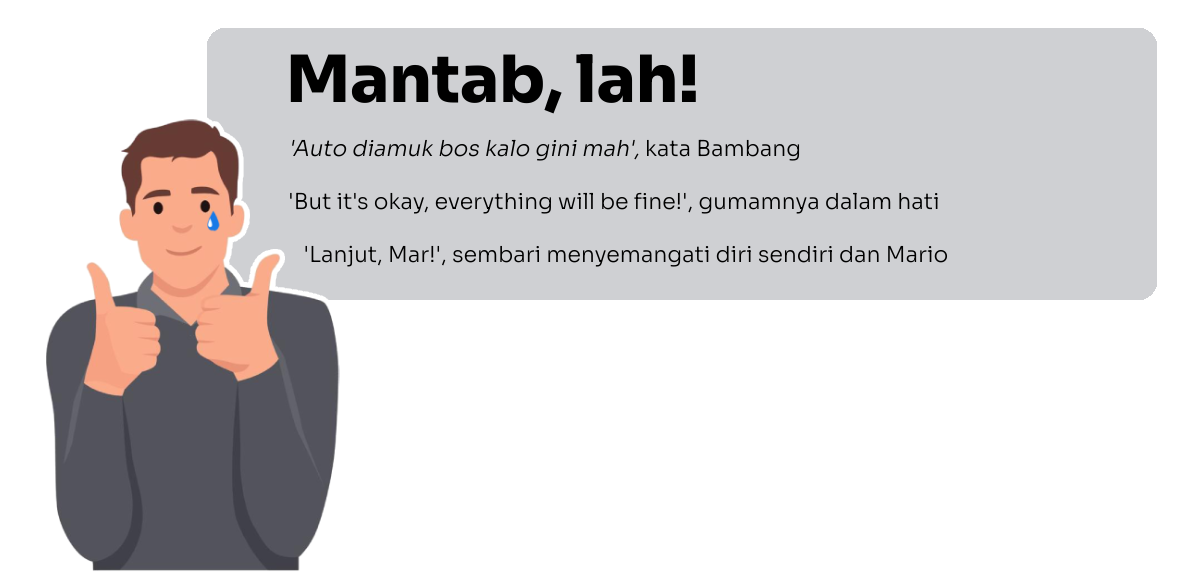

---

# **C. Identifikasi Masalah Utama**

Identifikasi masalah utama adalah proses menemukan apa sebenarnya masalah inti yang sedang dihadapi sebuah bisnis sebelum melakukan analisis atau mengambil keputusan. Hal ini seperti mencari akar persoalan (root cause), bukan hanya gejalanya.

### 👨‍💻 Task C - Identifikasi Masalah Utama

> *Langkah Awal, dari hasil visualisasi data total customer tiap status. Menurutmu apa masalah yang sedang dihadapi oleh perusahaan Telco tersebut?*


In [30]:
fig.show()

Insight :      

...

# **D. Statistika Deskriptif Univariate**

Statistika deskriptif adalah cabang statistika yang digunakan untuk menggambarkan, merangkum, dan menyajikan data agar mudah dipahami. Tujuannya bukan untuk menarik kesimpulan atau memprediksi sesuatu, tetapi untuk **memahami pola dasar dari data yang sudah ada**. Statistika deskriptif diantaranya adalah menghitung :
<br><br>

**Data Numerik**
1. **Ukuran Pemusatan** (*Measures of Central Tendency*) : Mean, Median dan Modus
2. **Ukuran Penyebaran** (*Measures of Variability*) : Range, Variance, Standard deviation dan
Interquartile range (IQR)
3. **Ukuran Bentuk Distribusi**
<br>

**Data Kategorik**
1. **Frekuensi** Data
2. **Proporsi** Data

### 👨‍💻 Task D1 - List Kolom Numerik & Kolom Kategorik

> *Tampilkan perhitungan statistika deskriptif semua kolom numerik pada DataFrame `data_telco_clean`*

<br>

Untuk menyeleksi kolom numerik atau kategorik saja pada DataFrame dapat menggunakan

```
DataFrame.select_dtypes(include = ['<type>']).columns
```


docs : *https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html*

In [31]:
# Task C1 - Definisikan kolom numerik
kolom_numerik = data_telco_clean.select_dtypes(include = ['number']).columns

# Tampilkan hasilnya
display(kolom_numerik)

Index(['age', 'number_of_dependents', 'satisfaction_score', 'cltv',
       'number_of_referrals', 'tenure_in_months', 'monthly_charge',
       'total_revenue'],
      dtype='object')

In [32]:
# Task C1 - Definisikan kolom non numerik
kolom_non_numerik = data_telco_clean.select_dtypes(include = ['object']).columns

# Tampilkan hasilnya
display(kolom_non_numerik)

Index(['customer_id', 'gender', 'married', 'customer_status', 'offer',
       'phone_service', 'multiple_lines', 'internet_service', 'internet_type',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies', 'contract',
       'payment_method', 'churn_category', 'churn_reason'],
      dtype='object')

### 👨‍💻 Task D2 - Statistik Deskriptif Kolom Numerik

> *Tampilkan perhitungan statistika deskriptif semua kolom numerik pada DataFrame `data_telco_clean`*

<br>

Untuk menghitung statistik deskriptif pada data numerik dengan cepat gunakan

```
DataFrame.describe(include = ['number'])
```


docs : *https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html*

In [33]:
# Task C2 - Statistik Deskriptif Numerik
descriptive_statistics = data_telco_clean.describe(include = ['number']).T

# Tampilkan hasilnya
display(descriptive_statistics)

count         mean          std     min     25%  \
age                   7041.0    46.501775    16.745828    19.0    32.0   
number_of_dependents  7041.0     0.468825     0.962906     0.0     0.0   
satisfaction_score    7041.0     3.245562     1.201232     1.0     3.0   
cltv                  7041.0  4400.191166  1182.938942  2003.0  3469.0   
number_of_referrals   7041.0     1.952422     3.001445     0.0     0.0   
tenure_in_months      7041.0    32.386167    24.542846     1.0     9.0   
monthly_charge        7041.0    64.750923    30.087517   18.25    35.5   
total_revenue         7041.0  3033.830746  2864.797445   21.36  605.47   

                          50%      75%       max  
age                      46.0     60.0      80.0  
number_of_dependents      0.0      0.0       9.0  
satisfaction_score        3.0      4.0       5.0  
cltv                   4527.0   5380.0    6500.0  
number_of_referrals       0.0      3.0      11.0  
tenure_in_months         29.0     55.0      72.0  
monthly_charge          70.35    89.85    118.75  
total_revenue         2108.64  4800.36  11979.34

#### **🔎 Task D2 - Insight**

Age : Rataan umur sebanding dengan nilai tengahnya yakni disekitar 46 tahun dengan simpangan baku 16,75 = 17 tahun. Seperempat pelanggan perusahaan telco berusia 32 tahun dan seperempatnya lagi lebih dari 60 tahun

## 👨‍💻 Task D3 - Statistik Deskriptif Kolom Kategorik

> *Tampilkan perhitungan frekuensi semua kolom kategorik pada DataFrame `data_telco_clean`*

<br>

Untuk menghitung statistik deskriptif pada data kategorik gunakan

```
Series.value_counts(dropna = False)
```


docs : *https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html*

In [34]:
# Task C3 - Statistik Deskriptif kolom Kategorik (non-numerik)
for col in kolom_non_numerik:
    jumlah_unik = data_telco_clean[col].nunique()
    frekuensi = data_telco_clean[col].value_counts(dropna = False)

    print(f'> Frekuensi \033[93m{col}\033[0m')
    print(f'  Terdapat {jumlah_unik} data unik\n')
    display(frekuensi)
    print('\n')

> Frekuensi customer_id
  Terdapat 7041 data unik



customer_id
3787-TRIAL    1
9640-ZSLDC    1
8815-LMFLX    1
4450-MDZFX    1
2129-ALKBS    1
             ..
7963-GQRMY    1
4763-PGDPO    1
4704-ERYFC    1
5673-FSSMF    1
0822-GAVAP    1
Name: count, Length: 7041, dtype: int64



> Frekuensi gender
  Terdapat 2 data unik



gender
Male      3554
Female    3487
Name: count, dtype: int64



> Frekuensi married
  Terdapat 2 data unik



married
No     3640
Yes    3401
Name: count, dtype: int64



> Frekuensi customer_status
  Terdapat 3 data unik



customer_status
Stayed     4720
Churned    1867
Joined      454
Name: count, dtype: int64



> Frekuensi offer
  Terdapat 6 data unik



offer
No Offer    3877
Offer B      823
Offer E      805
Offer D      601
Offer A      520
Offer C      415
Name: count, dtype: int64



> Frekuensi phone_service
  Terdapat 2 data unik



phone_service
Yes    6359
No      682
Name: count, dtype: int64



> Frekuensi multiple_lines
  Terdapat 2 data unik



multiple_lines
No     4072
Yes    2969
Name: count, dtype: int64



> Frekuensi internet_service
  Terdapat 2 data unik



internet_service
Yes    5515
No     1526
Name: count, dtype: int64



> Frekuensi internet_type
  Terdapat 3 data unik



internet_type
Fiber Optic    3033
DSL            1652
None           1526
Cable           830
Name: count, dtype: int64



> Frekuensi online_security
  Terdapat 2 data unik



online_security
No     5024
Yes    2017
Name: count, dtype: int64



> Frekuensi online_backup
  Terdapat 2 data unik



online_backup
No     4612
Yes    2429
Name: count, dtype: int64



> Frekuensi device_protection_plan
  Terdapat 2 data unik



device_protection_plan
No     4620
Yes    2421
Name: count, dtype: int64



> Frekuensi premium_tech_support
  Terdapat 2 data unik



premium_tech_support
No     4997
Yes    2044
Name: count, dtype: int64



> Frekuensi streaming_tv
  Terdapat 2 data unik



streaming_tv
No     4336
Yes    2705
Name: count, dtype: int64



> Frekuensi streaming_movies
  Terdapat 2 data unik



streaming_movies
No     4311
Yes    2730
Name: count, dtype: int64



> Frekuensi contract
  Terdapat 3 data unik



contract
Month-to-Month    3609
Two Year          1883
One Year          1549
Name: count, dtype: int64



> Frekuensi payment_method
  Terdapat 3 data unik



payment_method
Bank Withdrawal    3907
Credit Card        2749
Mailed Check        385
Name: count, dtype: int64



> Frekuensi churn_category
  Terdapat 5 data unik



churn_category
None               5174
Competitor          840
Attitude            313
Dissatisfaction     303
Price               211
Other               200
Name: count, dtype: int64



> Frekuensi churn_reason
  Terdapat 20 data unik



churn_reason
None                                         5174
Competitor had better devices                 313
Competitor made better offer                  311
Attitude of support person                    219
Don't know                                    130
Competitor offered more data                  117
Competitor offered higher download speeds      99
Attitude of service provider                   94
Price too high                                 78
Product dissatisfaction                        77
Network reliability                            72
Long distance charges                          64
Service dissatisfaction                        63
Moved                                          46
Extra data charges                             39
Limited range of services                      37
Poor expertise of online support               31
Lack of affordable download/upload speed       30
Lack of self-service on Website                29
Poor expertise of phone support                12
Deceased                                        6
Name: count, dtype: int64

#### **🔎 Task D3 - Insight**

...

## 👨‍💻 Task D4 - Distribusi Data

> *Pada DataFrame `data_telco_clean` tampilkan seluruh distribusi data numerik!*

Distribusi data adalah gambaran tentang bagaimana nilai-nilai dalam sebuah dataset tersebar. Dengan kata lain, distribusi data menjelaskan:

* Seberapa sering suatu nilai muncul
* Bagaimana pola penyebaran nilai (merata, menumpuk, miring, dll)
* Bentuk keseluruhan data

<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png" width="60%">

docs : *https://plotly.com/python/histograms/*

In [35]:
# Definisikan kolom beserta warnanya
color_map = {
  'age' : '#4E79A7',
  'satisfaction_score' : '#F28E2B',
  'cltv' : '#E15759',
  'number_of_referrals' : '#76B7B2',
  'tenure_in_months' : '#59A14F',
  'monthly_charge' : '#EDC948',
  'total_revenue' : '#B07AA1'
}

for col in color_map.keys():
    fig = px.histogram(
        data_telco_clean[col],
        x = col,
        # nbins = 50,
        color_discrete_sequence = [color_map.get(col)],
        marginal = "box"
    )

    fig.update_yaxes(
        showgrid = False,
        showticklabels=False,
        title =''
    )

    fig.update_layout(
        title={
          'text' : f'Distribusi <b><span style="color:{color_map.get(col)}">{col}</span></b> Pelanggan<b><br><sup><sup>Perusahaan Telekomunikasi</sup></sup>',
            'y':0.92,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        plot_bgcolor = 'rgba(0,0,0,0)',
        bargap = 0.01,
        title_font = dict(size = 25)
    )
    display(fig)

#### **🔎 Task D4 - Insight**

...

## 👨‍💻 Task D5 - Outlier

> *Pada DataFrame `data_telco_clean` identifikasi adanya outlier dengan box plot! Jika ditemukan indikasi outlier lakukan penanganan yang tepat*

Outlier adalah nilai data yang jauh berbeda atau menyimpang secara ekstrem dari sebagian besar data lain dalam sebuah dataset.

<img src="https://ouzhang.me/blog/outlier-series/sidebar-featured.jpg" width="40%">

Kriteria disebut outlier menurut statistika non-parameterik (statistika yang mengabaikan asumsi) adalah sebagai berikut :
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*0MPDTLn8KoLApoFvI0P2vQ.png" width="60%">

Sebuah nilai x disebut outlier apabila:
\begin{equation}
x < Q_1 - 1.5 \times IQR
\end{equation}
atau
\begin{equation}
x > Q_3 + 1.5 \times IQR
\end{equation}
dengan:
\begin{equation}
IQR = Q_3 - Q_1
\end{equation}

<br>

docs : *https://plotly.com/python/box-plots/*

In [36]:
import plotly.express as px

def box_plot(series, column_name, color):
    # Buat horizontal box plot
    fig = px.box(
        series,
        orientation = 'h',
        color_discrete_sequence  = [color]
    )

    # Update layout and display the plot
    fig.update_layout(
        title = f'<b>Box Plot {column_name}</b>',
        yaxis = dict(
            title = '',
            showgrid = False,
            showline = False,
            showticklabels = False,
            zeroline = False,
        ),
        xaxis = dict(
            title = column_name,
            showgrid = False,
            showline = True,
            showticklabels = True,
            zeroline = False,
        )
    )

    fig.show()

In [37]:
# Lakukan mapping kolom beserta warna
color_map = {
  'age' : '#4E79A7',
  'satisfaction_score' : '#F28E2B',
  'cltv' : '#E15759',
  'number_of_referrals' : '#76B7B2',
  'tenure_in_months' : '#59A14F',
  'monthly_charge' : '#EDC948',
  'total_revenue' : '#B07AA1'
}

# Terapkan ke semua kolom
for column, color in color_map.items():
    box_plot(data_telco_clean[column], column, color)

### Teknik Mengatasi Outlier : Winsorizing
**Winsorizing** adalah teknik untuk mengurangi efek outlier dengan mengganti nilai ekstrem ke nilai batas tertentu alih-alih menghapusnya.



In [38]:
# Fungsi untuk teknik winsorizing
def teknik_winsorizing(series):
    # Hitung Q1, Q3, dan IQR
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    # Hitung lower dan upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Winsorizing: clip nilai ke batas bawah & atas
    series = series.astype(pd.Float64Dtype())
    winsorized_series = series.clip(lower=lower_bound, upper=upper_bound)

    return (winsorized_series)

In [39]:
# Lakukan mapping kolom beserta warna
color_map = {
  'age' : '#4E79A7',
  'cltv' : '#E15759',
  'number_of_referrals' : '#76B7B2',
  'tenure_in_months' : '#59A14F',
  'monthly_charge' : '#EDC948',
  'total_revenue' : '#B07AA1'
}

# Terapkan ke semua kolom
for column, color in color_map.items():
    # Panggil fungsi teknik winsorizing
    data_telco_clean[column] = teknik_winsorizing(data_telco_clean[column])
    # Tampilkan boxplotnya
    box_plot(data_telco_clean[column], column, color)

#### **🔎 Task D5 - Insight**

...

# **E. Statistik Deskriptif Multivariate**



##**Korelasi**
Korelasi adalah ukuran statistik yang menunjukkan seberapa kuat dan seberapa arah hubungan antara dua variabel.
<img src="https://www.simplypsychology.org/wp-content/uploads/correlation.jpg" width="40%">

Koefisien korelasi dirumuskan sebagai
\begin{equation}
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
\end{equation}
<br>
Dengan kriteria <br>
<img src="https://i0.wp.com/itfeature.com/wp-content/uploads/2024/05/Coefficient-of-Correlation-range.jpg" width="40%">

### 👨‍💻 Task E1 - Korelasi

> *Pada DataFrame `data_clean_telco` coba hitung dan visualisasikan korelasi antar variabelnya*

In [40]:
# Task D1 - Hitung korelasi
data_corr = data_telco_clean[kolom_numerik].corr()

# Tampilkan hasilnya
display(data_corr)

age  number_of_dependents  satisfaction_score  \
age                   1.000000             -0.118822           -0.084360   
number_of_dependents -0.118822              1.000000            0.152696   
satisfaction_score   -0.084360              0.152696            1.000000   
cltv                 -0.002093              0.049667            0.076032   
number_of_referrals  -0.024276              0.285864            0.189877   
tenure_in_months      0.009810              0.108265            0.210731   
monthly_charge        0.144173             -0.131697           -0.223414   
total_revenue         0.047893              0.038233            0.095284   

                          cltv  number_of_referrals  tenure_in_months  \
age                  -0.002093            -0.024276          0.009810   
number_of_dependents  0.049667             0.285864          0.108265   
satisfaction_score    0.076032             0.189877          0.210731   
cltv                  1.000000             0.125807          0.396108   
number_of_referrals   0.125807             1.000000          0.337514   
tenure_in_months      0.396108             0.337514          1.000000   
monthly_charge        0.098606             0.032089          0.247619   
total_revenue         0.353892             0.271708          0.853495   

                      monthly_charge  total_revenue  
age                         0.144173       0.047893  
number_of_dependents       -0.131697       0.038233  
satisfaction_score         -0.223414       0.095284  
cltv                        0.098606       0.353892  
number_of_referrals         0.032089       0.271708  
tenure_in_months            0.247619       0.853495  
monthly_charge              1.000000       0.588948  
total_revenue               0.588948       1.000000

In [41]:
import plotly.express as px

# Buat Grafiknya
fig = px.imshow(
    data_corr,
    color_continuous_scale='blues',
    title = '<b>Korelasi Kolom Numerik Dataset Telco<b>',
    text_auto = True
)

#Menyembunyikan skala/rentang korelasi
fig.update_coloraxes(showscale=False)

#Atur judul heatmap
fig.update_layout(
    title = dict(
        x=0.5,
        y=0.9,
        xanchor='center',
        yanchor='top'
    ),
    width=1000,   # lebar figure (px)
    height=800
)

#Menampilkan heatmap
fig.show()

## **Lebih Jauh, Breakdown!**




## 👨‍💻 Task E2 - Breakdown

> *Tampilkan sebaran kolom numerik pada DataFrame `data_clean_telco` berdasarkan masing - masing kategori (Stayed dan Churned)*

Note : Gunakan referensi berikut :
https://plotly.com/python/distplot/ atau https://plotly.github.io/plotly.py-docs/generated/plotly.figure_factory.create_distplot.html

In [42]:
# Import library yang dibutuhkan
import plotly.figure_factory as ff

def distribution_plot(data_cat_1, data_cat_2, label, column_name):
    # Group data together
    data_cat_1 = data_cat_1[column_name]
    data_cat_2 = data_cat_2[column_name]
    hist_data = [data_cat_1, data_cat_2]
    group_labels = label

    # Create distplot with custom bin_size
    fig = ff.create_distplot(
        hist_data,
        group_labels,
        show_hist = False,
        show_rug = False
    )

    fig.update_layout(
        plot_bgcolor = 'rgba(0, 0, 0, 0)',
        title = dict(
            text = f"<b>Distribusi {column_name} Pelanggan</b><br><sup><sup>Berdasarkan Status Pelanggan</sup></sup>",
            font = dict(
                size = 28,
                color = 'black'
            ),
            y = 0.92,
            x = 0.5
        )
    )

    fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
    fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

    # Tampilkan visualisasi
    fig.show()

In [43]:
# Bagi data kedalam kelompok
non_churn_cust = data_telco_clean[data_telco_clean['customer_status'] != 'Churned']
churn_cust = data_telco_clean[data_telco_clean['customer_status'] == 'Churned']
label_grup =  ['Stayed', 'Churned']

# Panggil fungsi
for col in ['tenure_in_months', 'cltv', 'monthly_charge', 'total_revenue']:
    distribution_plot(
        data_cat_1 = non_churn_cust,
        data_cat_2 = churn_cust,
        label = label_grup,
        column_name = col
    )

#### **🔎 Task E2 - Insight**

...

## 👨‍💻 Task E3 - Menyelam Lebih Dalam!

> *Dari DataFrame `data_telco_clean` dengan status customer = Churned tampilkan proporsi masing - masing kolom kategoriknya dalam visualisasi data! Adakah hal menarik yang ditemukan? Share your answer!*


In [44]:
# Filter data churn saja
data_telco_churn = data_telco_clean[data_telco_clean['customer_status'] == 'Churned']

# Definisikan kolom perhitungan
column_name = [
   'phone_service',
   'internet_service',
   'internet_type',
   'contract',
   'payment_method'
]

# Dataframe kosong sebagai penampung
data_agg = pd.DataFrame()

# Proses agregasi
for i in range(len(column_name)):
    agg = data_telco_churn.groupby(column_name[i], as_index = False).agg(total = ('customer_id', 'count'))
    agg = agg.rename(columns = {column_name[i] : 'type'})
    agg.insert(0, 'column', column_name[i])
    agg['percentage'] = round(agg['total'] / agg.groupby('column')['total'].transform('sum') * 100, 2)
    agg['percentage'] = agg['percentage'].astype(str) + '%'

    if(i == 0):
      data_agg = agg
    else:
      data_agg = pd.concat([data_agg, agg])

In [45]:
# Urutkan data
data_agg = data_agg.sort_values(by = ['column', 'total'], ascending = [True, False], ignore_index = True)

# Tampilkan
display(data_agg)

column             type  total percentage
0           contract   Month-to-Month   1654     88.59%
1           contract         One Year    165      8.84%
2           contract         Two Year     48      2.57%
3   internet_service              Yes   1754     93.95%
4   internet_service               No    113      6.05%
5      internet_type      Fiber Optic   1234     70.35%
6      internet_type              DSL    307      17.5%
7      internet_type            Cable    213     12.14%
8     payment_method  Bank Withdrawal   1327     71.08%
9     payment_method      Credit Card    398     21.32%
10    payment_method     Mailed Check    142      7.61%
11     phone_service              Yes   1697     90.89%
12     phone_service               No    170      9.11%

In [46]:
# Atur lebih dahulu datanya
max_values = data_agg.groupby('column')['total'].transform('max')
data_agg['max_flag'] = (data_agg['total'] == max_values)

# Filter hanya data dengan nilai paling tinggi per masing-masing kategori
data_agg = data_agg[data_agg['max_flag'] == True]\
    .sort_values(by = 'total', ascending = True, ignore_index = True)

# Tampilkan hasilnya
display(data_agg)

column             type  total percentage  max_flag
0     internet_type      Fiber Optic   1234     70.35%      True
1    payment_method  Bank Withdrawal   1327     71.08%      True
2          contract   Month-to-Month   1654     88.59%      True
3     phone_service              Yes   1697     90.89%      True
4  internet_service              Yes   1754     93.95%      True

In [47]:
import plotly.express as px

# Buat bar horizontal
fig = px.bar(
    data_agg,
    x = 'total',
    y = 'column',
    orientation = 'h',
    text = 'type',
    color_discrete_sequence = ['#E78895'],
)

# Update warna anotasi menjadi putih
fig.update_traces(
    textfont_color = 'white'
)

# Proses update layout
fig.update_layout(
    width = 1200,
    height = 600,
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    showlegend = False,
    title = dict(
        text = '<b>Profile Pelanggan Churn</b>',
        font = dict(
            size = 30,
            color = 'black'
        ),
        x = 0.03
    ),
    xaxis = dict(
        title = ''
    ),
    yaxis = dict(
        title = ''
    ),
    margin = dict(
        t = 100,
        l = 100,
        b = 100,
        r = 100
    )
)

annotations = []
for i in range(len(data_agg)):
    annotations.append(
        dict(
            x = data_agg['total'][i],
            y = data_agg['column'][i],
            text = f"{data_agg['percentage'][i]}",
            showarrow = False,
            font = dict(
                color='#F9B5D0'
            ),
            xanchor = 'left',
            xshift = 2
        )
    )

# Tambahkan anotasi
fig.update_layout(annotations=annotations)

# Tampilkan grafik
fig.show()

# **F. Kesimpulan**

...


**Written By :** <br>
<a href="https://linkedin.com/in/granistogurning"><img alt="Linked In Link" src="https://img.shields.io/badge/-Granisto%20Gurning-0072b1?style=for-the-badge&logo=None&logoColor=white" align="left"/></a>

<br><br>**for :**

<a href="https://dqlab.id/"><img src="https://dqlab.id/files/dqlab/cache/87e30118ebba5ec7d96f6ea8c9dcc10b_x_118_X_55.png" align="left" /></a>